# Working with SNOMED hierarchies

In [1]:
import json
import pandas as pd
import collections

In [2]:
# Load files
snomed_cdb_df = pd.read_csv(r"/Users/shek/Documents/GitHub/Clinical-Coding-Pilot/snomed_rela_csv_SNOMED-CT-full_UK_drug_ext_Release_20200228.csv")

with open('isa_rela_ch2pt.txt') as json_file:
    ch2pt = json.load(json_file)
with open('isa_rela_pt2ch.txt') as json_file:
    pt2ch = json.load(json_file)

In [3]:
# Functions for finding the concept name and all synonymns for a SNOMED concept

def find_name(snomedcode):
    """
    Converts SNOMED code to Fully specified name and finds any Synonyms
    """
    df = snomed_cdb_df[(snomed_cdb_df['cui'] == snomedcode) & (snomed_cdb_df['tty'] == 1)]
    concept_name = df['str'].values
    return f"{''.join(concept_name)}"

def find_syn(snomedcode):
    """
    Converts SNOMED code and finds all Synonyms. Not including concept name
    """
    df = snomed_cdb_df[(snomed_cdb_df['cui'] == snomedcode) & (snomed_cdb_df['tty'] == 0)]
    synonym = df['str'].to_list()
    return f"{'; '.join(synonym)}"

In [4]:
# Get parents of snomed code
def get_parents(snomed): 
    result = [] 
    stack = [snomed] 

    while len(stack) != 0:
        # remove the last element from the stack
        current_snomed = stack.pop()
        current_snomed_children = ch2pt.get(current_snomed, [])
        stack.extend(current_snomed_children)
        result.append(current_snomed) 
    return result 

# Get all children of snomed code
def get_children(snomed): 
    result = [] 
    stack = [snomed] 

    while len(stack) != 0: 
        # remove the last element from the stack
        current_snomed = stack.pop()
        current_snomed_parent = pt2ch.get(current_snomed, [])
        stack.extend(current_snomed_parent)
        result.append(current_snomed)
    return result


## Finding the first common parent

In [5]:
def common_parent(snomed1, snomed2):
    for parent in get_parents(snomed1):
        if parent in get_parents(snomed2):
            return parent


def get_parent_from_list(snomed_list):
    if len(snomed_list) == 2:
        return common_parent(snomed_list[0], snomed_list[1])
    else:
        first_snomed = snomed_list[0]
        rest_of_snomed = snomed_list[1:]
        rest_of_snomed_parent = get_parent_from_list(rest_of_snomed)
        return common_parent(first_snomed, rest_of_snomed_parent)

In [6]:
a = ["S-426634003", "S-703150000", "S-41510006"]
for _ in a:
    print(find_name(_))

Eclamptic seizure (finding)
Single seizure (finding)
Anoxic seizure (finding)


In [7]:
get_parent_from_list(a)

'S-91175000'

In [8]:
find_name('S-91175000')

'Seizure (finding)'

In [9]:
a = ["S-426634003", "S-91175000", "S-41510006"]
for _ in a:
    print(find_name(_))

Eclamptic seizure (finding)
Seizure (finding)
Anoxic seizure (finding)


In [ ]:
get_parent_from_list(a)

'S-91175000'

In [11]:
find_name('S-91175000')

'Seizure (finding)'

In [ ]:
# TODO: Issues when concepts have two parents.
# this will return the only one of these parents

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

g = nx.DiGraph()
g.add_nodes_from(pt2ch.keys())
for k, v in pt2ch.items():
    g.add_edges_from(([(k, t) for t in v]))

In [ ]:
nx.draw(g, with_labels=True)
plt.savefig("simple_path.png") # save as png
plt.show() # display

In [62]:
ch = []
ch.append("S-102957003")
for a in pt2ch["S-102957003"]:
    ch.append(a)
    

In [64]:
len(ch)

63

In [67]:
test = {}
for key in ch:
    case = {key: pt2ch.get(key)}
    test.update(case)

In [68]:
test

{'S-102957003': ['S-106144008',
  'S-106145009',
  'S-106147001',
  'S-106150003',
  'S-106169008',
  'S-106175004',
  'S-220363002',
  'S-110362007',
  'S-248024008',
  'S-297122007',
  'S-299960009',
  'S-302261000',
  'S-313287004',
  'S-124868006',
  'S-124869003',
  'S-124870002',
  'S-124871003',
  'S-124872005',
  'S-13028004',
  'S-18460000',
  'S-20818009',
  'S-30553004',
  'S-44594002',
  'S-53369002',
  'S-73466007',
  'S-91454002',
  'S-163586006',
  'S-267070008',
  'S-164716009',
  'S-164718005',
  'S-398991009',
  'S-102987009',
  'S-102988004',
  'S-102990003',
  'S-102991004',
  'S-17450006',
  'S-28581003',
  'S-407628009',
  'S-386783003',
  'S-264552009',
  'S-414849009',
  'S-416781007',
  'S-163626002',
  'S-163780002',
  'S-163802002',
  'S-163899004',
  'S-164648004',
  'S-271888005',
  'S-271890006',
  'S-308921004',
  'S-103257003',
  'S-246779003',
  'S-12273009',
  'S-428334004',
  'S-17360003',
  'S-719745000',
  'S-914391000000107',
  'S-931031000000104',

In [ ]:
new_tax_dict = { 
    'Primates': ['Haplorrhini', 'Strepsirrhini'], 
    'Tarsiiformes': ['Tarsius tarsier'], 
    'Haplorrhini': ['Tarsiiformes', 'Simiiformes'], 
    'Simiiformes': ['Hominoidea'], 
    'Lorisidae': ['Loris tardigradus'], 
    'Lemuriformes': ['Allocebus trichotis'], 
    'Lorisiformes': ['Galago alleni','Galago moholi'], 
    'Hominoidea': ['Pongo abelii', 'Pan troglodytes'], 
    'Strepsirrhini': ['Lorisidae', 'Lemuriformes', 'Lorisiformes'] 
}

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

g = nx.DiGraph()
g.add_nodes_from(test.keys())
for k, v in test.items():
    if v == None:
        pass
    else:
        g.add_edges_from(([(k, t) for t in v]))

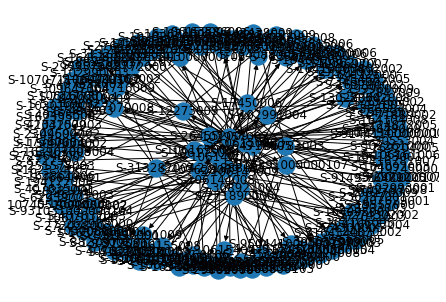

In [76]:
nx.draw(g, with_labels=True)
# plt.savefig("simple_path.png") # save as png
plt.show() # display

In [72]:
%matplotlib inline

In [74]:
plt.show()